In [1]:
#Why do diversity plots not work?

In [3]:
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np
import pandas as pd
import os
import requests
import sys

import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd


DEBUG:ATOM:Model tracker client not supported in your environment; will save models in filesystem only.


In [4]:
import deepchem as dc

In [5]:
target_name='QM9_Dataset'

In [ ]:
#ofile=target_name+'_dtc.csv'


In [6]:
import io
url = 'https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv'
download = requests.get(url).content

In [7]:
orig_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

In [8]:
orig_df.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028


In [ ]:
#not needed but just for the example
print('Before replace: ', orig_df.columns)
# remove special character 
orig_df.columns = orig_df.columns.str.replace(' ', '_')  
print('After replace: ', orig_df.columns)
# replace uppercase to lowercase
orig_df.columns= orig_df.columns.str.lower()
print('After replaceing colnames with lcase: ', orig_df.columns)

In [9]:
orig_df = orig_df.head(50)

In [10]:
orig_df['rdkit_smiles'] = orig_df['smiles'].apply(curate_data.base_smiles_from_smiles)

orig_df['inchi_key'] = orig_df['smiles'].apply(struct_utils.smiles_to_inchi_key)

[21:41:15] WARNING: Omitted undefined stereo



In [11]:
orig_df.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,rdkit_smiles,inchi_key
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,C,VNWKTOKETHGBQD-UHFFFAOYSA-N
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,N,QGZKDVFQNNGYKY-UHFFFAOYSA-N
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,O,XLYOFNOQVPJJNP-UHFFFAOYSA-N
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,C#C,HSFWRNGVRCDJHI-UHFFFAOYSA-N
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,C#N,LELOWRISYMNNSU-UHFFFAOYSA-N


In [12]:
ofile = target_name+'_dtc_smiles_raw.csv'
print(ofile)

QM9_Dataset_dtc_smiles_raw.csv


In [13]:
# import few libraries from AMPL
import atomsci.ddm.utils.pubchem_utils as pu
from os import path

myList = orig_df['inchi_key'].unique().tolist()

# Retrieve SMILES strings for compounds through PUBCHEM web interface.

# Let us make sure the ofile exists, if it exists then print 'File exists' and 
# if it doesnt exist, let us print "SMILES data doesnt not exist, downloading from
# PubCHEM"

if not path.exists(ofile) :
    print("SMILES data not found, download from PubChem ",ofile)
    save_smiles_df, fail_lst, discard_lst = pu.download_smiles(myList)
    save_smiles_df.to_csv(ofile)
else :
    print(ofile, 'Exists!')


QM9_Dataset_dtc_smiles_raw.csv Exists!


Post-processing dataset

Total Number of results = 50
dataset mean = 0.31624800000000003 eV
dataset stdev = 0.06817185738100077 eV
dataset max = 0.5048 eV
dataset min = 0.1555 eV



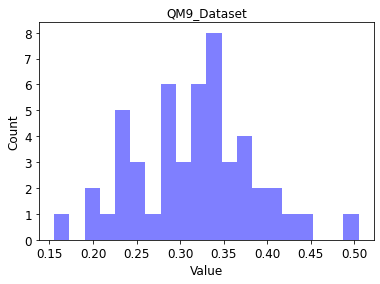

In [14]:
 
# !=np.inf uses the Numpy library and the != portion checks to see if the value 
# of two operands, the object of an operation, are equal. If they are not equal the 
# condition is true
# The np.inf portion indicates the Numpy module which can be used to represent 
# positive infinite value
data=orig_df[orig_df['gap'] != np.inf]

# Here we are defining our column, which will be PIC50
column = 'gap'

# Here we are using the num_bins parameter to determine the number of bins our data will be divided into, creating 20 different peaks
# These peaks will be visualized on our graph
num_bins = 20

# Here we are setting our title for the graph as our target name 
title = target_name

# Here we are specifying the units that are used, which in our case we are using nanometers 
units = 'eV'

# Using the filepath function, we are defining our file
filepath = ""

# This is the same variable we created earlier called data 
data=orig_df[orig_df['gap'] != np.inf]

# Using the summarize_data submodule, we are going to compile a set of data summarization tools to calculate several descriptive features
# These features include: column, num_bins, title, units, filepath, and data
curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [15]:
ifile = target_name+'_dtc_smiles_raw.csv'

In [16]:
dp.diversity_plots(dset_key = data,
                   datastore = False,
                   response_col = 'gap',
                   max_for_mcs = 100)

TypeError: argument of type 'method' is not iterable

In [17]:
#Tanimoto
feat_type = 'ECFP'
dist_metric = 'tanimoto'
smiles_lst1 = data['rdkit_smiles'].tolist()
calc_type = 'nearest'
dist_sample = cd.calc_dist_smiles(feat_type, dist_metric, smiles_lst1, None, calc_type)

In [18]:
print(len(dist_sample))
print(len(smiles_lst1))

50
50


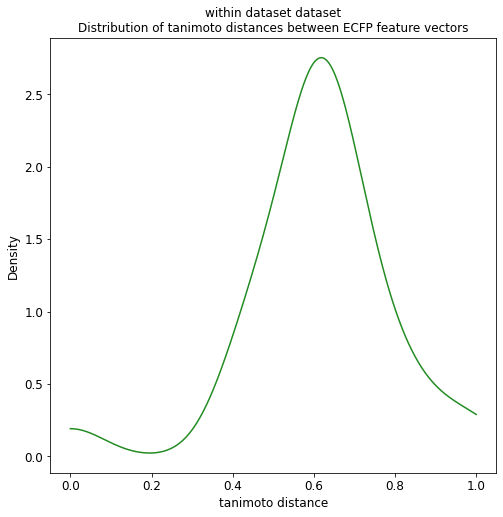

In [19]:
from scipy.stats.kde import gaussian_kde

# import math library
#import numpy as np

# for creating plots
import matplotlib.pyplot as plt

# current directory
odir='./'

# name for the task
task_name='within dataset'

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')